In [2]:
import sys
import os
import math
from matplotlib.lines import Line2D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import geodatasets
import geopandas as gpd
import re
import folium
from folium import plugins
import earthpy as et
import webbrowser
from matplotlib.colors import LogNorm, Normalize
from matplotlib import rcParams, font_manager
from matplotlib.cm import get_cmap
from branca.colormap import LinearColormap
import statsmodels.api as sm
from scipy.stats import norm
import elevation
import shapely.geometry
from shapely.geometry import Point, box, Polygon, MultiPolygon
import seaborn as sns
from shapely.wkt import loads
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px
import rasterio
from rasterio.plot import show
from rasterio.warp import reproject, Resampling, calculate_default_transform
from rasterio.transform import from_bounds, from_origin
from rasterio.mask import mask
import earthpy.spatial as es
from scipy.interpolate import RegularGridInterpolator
from matplotlib.backends.backend_pdf import PdfPages
import streamlit as st
import matplotlib.colors as mcolors
import PyCO2SYS as cs


In [3]:

df_deltag = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Code/Trav_3_data_Final.xlsx')

df_deltag_Altest = pd.read_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Code/Trav_3_data_AlTest.xlsx')


df_copy = df_deltag.copy()

df_deltag_Altest_copy = df_deltag_Altest.copy()

In [4]:
df_deltag_Altest_copy['deltag_Albite_Altest_kJmol'] = 8.314*(df_deltag_Altest_copy['Temperature']+273)*2.3*(df_deltag_Altest_copy['SI_Albite'])/1000

# now anorthite
df_deltag_Altest_copy['deltag_Anorthite_Altest_kJmol'] = 8.314*(df_deltag_Altest_copy['Temperature']+273)*2.3*(df_deltag_Altest_copy['SI_Anorthite'])/1000

# now K-feldspar
df_deltag_Altest_copy['deltag_Kfeldspar_Altest_kJmol'] = 8.314*(df_deltag_Altest_copy['Temperature']+273)*2.3*(df_deltag_Altest_copy['SI_K-feldspar'])/1000

In [10]:
# deltag = R*T*2.3*SI_Albite
# deltag = 8.314*(df_copy['Temperature']+273)*2.3*df_copy:
#SI_Albite_y	SI_Anorthite_y SI_K-feldspar_y

df_copy['deltag_Albite_kJmol'] = 8.314*(df_copy['Temperature']+273)*2.3*(df_copy['SI_Albite_y'])/1000

df_copy['deltag_Anorthite_kJmol'] = 8.314*(df_copy['Temperature']+273)*2.3*(df_copy['SI_Anorthite_y'])/1000

df_copy['deltag_K-feldspar_kJmol'] = 8.314*(df_copy['Temperature']+273)*2.3*(df_copy['SI_K-feldspar_y'])/1000




In [14]:
df_copy['deltag_overall'] = 8.314*(df_copy['Temperature']+273)*2.3*(df_copy['SI_K-feldspar_y'] + np.log(0.8))/1000
df_copy.to_excel('/Users/enrico/Desktop/Part III Project/Code/Nepal-1/Code/Trav_3_deltaG.xlsx')

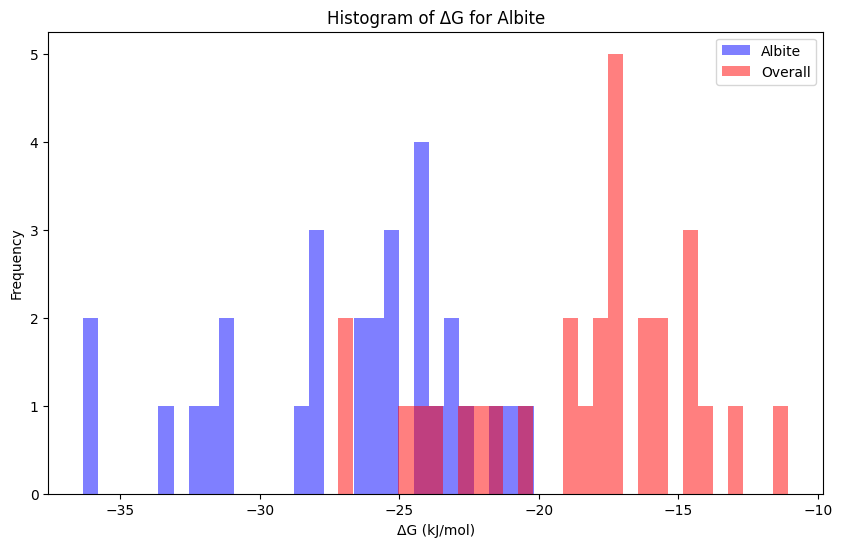

In [13]:
# plot data on a histogram for the three feldspars, all three on the same histogram but different colours
plt.figure(figsize=(10, 6))
plt.hist(df_copy['deltag_Albite_kJmol'], bins=30, alpha=0.5, label='Albite', color='blue')
plt.hist(df_copy['deltag_overall'], bins=30, alpha=0.5, label='Overall', color='red')

#plt.hist(df_copy['deltag_Anorthite_kJmol'], bins=30, alpha=0.5, label='Anorthite', color='green')
#plt.hist(df_copy['deltag_K-feldspar_kJmol'], bins=30, alpha=0.5, label='K-feldspar', color='red')
plt.xlabel('ΔG (kJ/mol)')
plt.ylabel('Frequency')
plt.title('Histogram of ΔG for Albite')
plt.legend(loc='upper right')
plt.savefig('Albite_histogram.pdf')
plt.show()

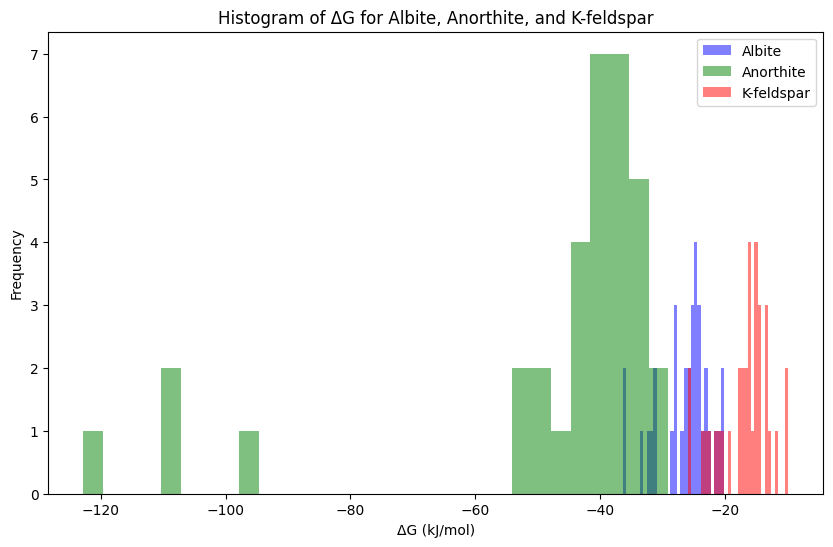

In [7]:
# plot data on a histogram for the three feldspars, all three on the same histogram but different colours
plt.figure(figsize=(10, 6))
plt.hist(df_deltag_Altest_copy['deltag_Albite_Altest_kJmol'], bins=30, alpha=0.5, label='Albite', color='blue')
plt.hist(df_deltag_Altest_copy['deltag_Anorthite_Altest_kJmol'], bins=30, alpha=0.5, label='Anorthite', color='green')
plt.hist(df_deltag_Altest_copy['deltag_Kfeldspar_Altest_kJmol'], bins=30, alpha=0.5, label='K-feldspar', color='red')
plt.xlabel('ΔG (kJ/mol)')
plt.ylabel('Frequency')
plt.title('Histogram of ΔG for Albite, Anorthite, and K-feldspar')
plt.legend(loc='upper right')
plt.show()